In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df1=pd.read_csv("../input/CAvideos.csv")
df2=pd.read_csv("../input/GBvideos.csv")
df1=df1.copy()
df2=df2.copy()

In [2]:
df1.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


# Which channel has got most likes

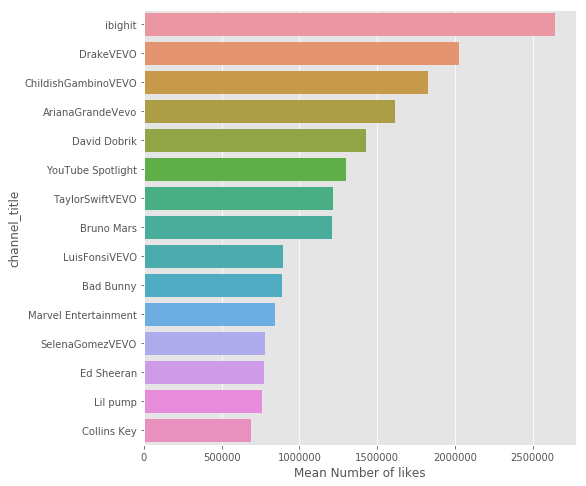

In [3]:


plt.style.use("ggplot")
disliked=pd.DataFrame(df1.groupby(["channel_title"])["likes"].agg("mean").sort_values(ascending=False))[:15]
plt.figure(figsize=(10,8))
sns.barplot(y=disliked.index,x=disliked.likes,data=disliked)
plt.gca().set_xlabel("Mean Number of likes")
#plt.gca().set_xticklabels(disliked.likes,rotation="45")
plt.gcf().subplots_adjust(left=.3)
plt.show()

# Channels that has maximum number of videos

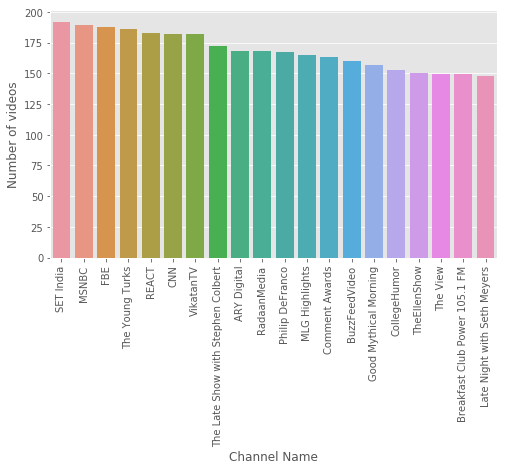

In [4]:

plt.style.use("ggplot")
channels=pd.DataFrame(df1.groupby(["channel_title"])["video_id"].agg("count").sort_values(ascending=False))[:20]
plt.figure(figsize=(8,8))
sns.barplot(y=channels.video_id,x=channels.index,data=channels)
plt.gcf().subplots_adjust(bottom=.45)
plt.gca().set_xticklabels(channels.index,rotation="90")
plt.gca().set_ylabel("Number of videos")
plt.gca().set_xlabel("Channel Name")
plt.show()


# Likes,dislikes,comments for The young Turks

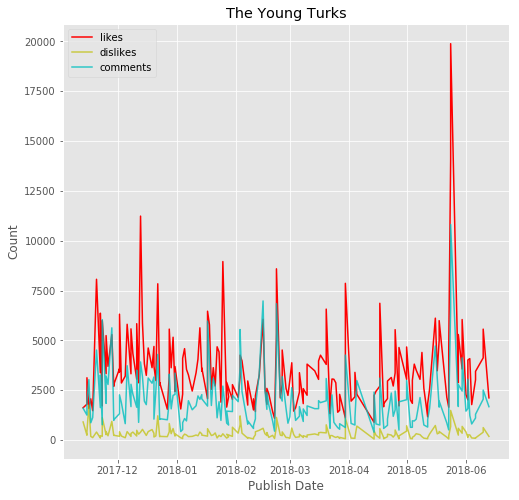

In [5]:
young=df1[df1["channel_title"]=="The Young Turks"][["likes","dislikes","publish_time","comment_count"]].reset_index()
young["publish_time"]=young["publish_time"].apply(lambda x : pd.to_datetime(x[:10]))
plt.figure(figsize=(8,8))
plt.plot(young["publish_time"],young["likes"],color="red",label="likes")
plt.plot(young["publish_time"],young["dislikes"],color="y",alpha=.7,label="dislikes")
plt.plot(young["publish_time"],young["comment_count"],color='c',alpha=.8,label="comments")
plt.gca().set_xlabel("Publish Date")
plt.gca().set_ylabel("Count")
plt.gca().set_title("The Young Turks")
plt.legend()
plt.show()


## Which channel gets its videos trending quickly

In [6]:
trending=df1[["publish_time","trending_date","channel_title"]]
trending=trending.copy()
trending["publish_time"]=trending["publish_time"].apply(lambda x : pd.to_datetime(x).date())
trending["trending_date"]=trending["trending_date"].apply(lambda x: pd.to_datetime(x,format="%y.%d.%m").date())
trending["days"]=(trending["trending_date"]-trending["publish_time"])
trending.sort_values(by="days")
trending["days"]=trending.days.apply(lambda x : x.days)
mean=pd.DataFrame(trending.groupby("channel_title")["days"].agg("mean").sort_values(ascending=False))
mean[mean["days"]==0]

,days
channel_title,
Sudbury.com,0.0
Tracksuit Andy,0.0
Travel Tube,0.0
magicelf1980,0.0
Shikha Kherada,0.0
Doug Ketchum,0.0
Mathieu Désy,0.0
Fatal Vows,0.0
b0rd3n,0.0


## Which channels took more than an year to make their videos as trending

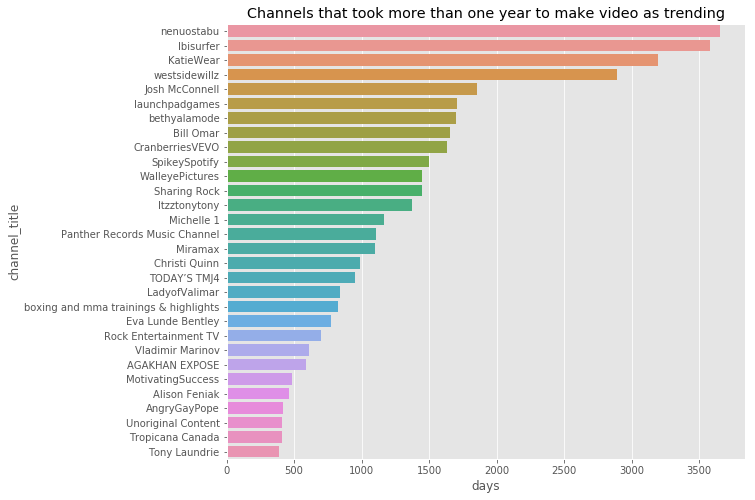

In [7]:
year=mean[mean["days"]>365]
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
sns.barplot(y=year.index,x=year["days"])
plt.gcf().subplots_adjust(left=.3)
plt.gca().set_title("Channels that took more than one year to make video as trending")
plt.gcf().savefig("more_than_an_year")
plt.show()